In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

PROJECT_DIR = os.path.join(os.getcwd(), os.pardir)
%matplotlib inline

# Introduction

This notebooks loads up the data, explores it a bit, and does some cleaning. It results the train and test csv files, as well as the pretrained GloVe embeddings.

# Read In

In [46]:
df = pd.read_csv(os.path.join(PROJECT_DIR,"data/external/jokes.csv"),  encoding = "utf-8", index_col = "id")

In [47]:
df.head()

,date,downs,score,text,title,ups,upvote_ratio,url
id,,,,,,,,
6z8wju,1.505058e+09,0,1,"She cant make a Yo Mama Joke, oh wait, that’s ...",Yo Mama So Stupid.....,1,1.0,https://www.reddit.com/r/Jokes/comments/6z8wju...
6z8vwj,1.505058e+09,0,0,\nSnacks.,What do cannibals call midgets?,0,0.5,https://www.reddit.com/r/Jokes/comments/6z8vwj...
6z8vgv,1.505058e+09,0,1,I only come once a year,My wife makes me feel like christmas,1,1.0,https://www.reddit.com/r/Jokes/comments/6z8vgv...
6z8vea,1.505058e+09,0,1,Pennywise.,What do you call someone who gets their 1p cha...,1,1.0,https://www.reddit.com/r/Jokes/comments/6z8vea...
6z8v59,1.505058e+09,0,2,A chicken and an egg are lying in bed. The chi...,Who Came First,2,1.0,https://www.reddit.com/r/Jokes/comments/6z8v59...


In [48]:
df.columns

Index(['date', 'downs', 'score', 'text', 'title', 'ups', 'upvote_ratio',
       'url'],
      dtype='object')

In [49]:
df.shape

(319747, 8)

Can see that there are 9 columns (including the id column). These columns are:

|Variable      | Description |
|:-------      | :------------:|
| **id**           | Unique identifier assigned by Reddit|
| **date**         | Post submission date, in Unix epoch time (seconds
| **since**        | January 1, 1970)
| **downs**        | Number of downvotes. Due to reddit protections, always equal to 0
| **score**        | Net upvotes (fuzzed)
| **text**         | Text of submission/post
| **title**        | Title of submission/post
| **ups**          | Number of upvotes. Due to reddit protections, this is equal to the score variable
| **upvote_ratio** | Upvote ratio, ratio of upvotes to total votes
| **url**           | Link to original post.

There are 319,747 records. A decent amount of data

# Analyze scores

In [50]:
np.percentile(df.ups, q = [1, 5, 10, 25, 50, 75, 90, 95, 99, 100])

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.00000000e+00,   2.00000000e+01,
         1.13000000e+02,   3.21700000e+02,   2.58354000e+03,
         9.80860000e+04])

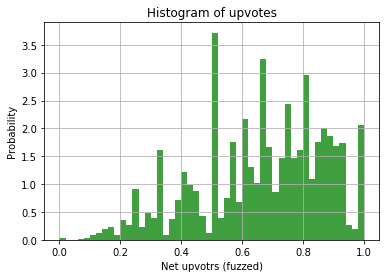

In [51]:
plt.hist(df.upvote_ratio, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Net upvotrs (fuzzed)')
plt.ylabel('Probability')
plt.title('Histogram of upvotes')
plt.grid(True)
plt.show()

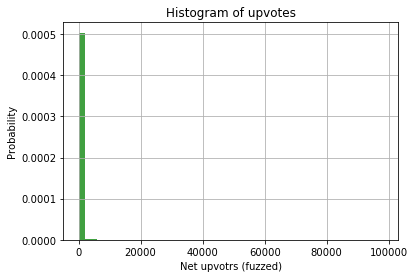

In [52]:
plt.hist(df.ups, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Net upvotrs (fuzzed)')
plt.ylabel('Probability')
plt.title('Histogram of upvotes')
plt.grid(True)
plt.show()

# Analyze lengths 

In [53]:
text_length = df.text.str.len()

In [54]:
df[~(text_length >= 4)].head()

,date,downs,score,text,title,ups,upvote_ratio,url
id,,,,,,,,
6z7zds,1.505047e+09,0,1,NaN,I hate it when people don't finish their jokes...,1,0.56,https://www.reddit.com/r/Jokes/comments/6z7zds...
6z7xeo,1.505046e+09,0,1,NaN,20 insane ways to get your app blocked. You wo...,1,0.60,https://www.reddit.com/r/Jokes/comments/6z7xeo...
6z1pi5,1.504964e+09,0,1,NaN,Opinions Are Like Assholes. Keep your thoughts...,1,0.60,https://www.reddit.com/r/Jokes/comments/6z1pi5...
6yxzh9,1.504909e+09,0,0,c4,What's a terrorist's favourite chess opening?,1,0.56,https://www.reddit.com/r/Jokes/comments/6yxzh9...
6y8lw8,1.504624e+09,0,0,Pi,What does 3.14159265 in the bathroom?,0,0.45,https://www.reddit.com/r/Jokes/comments/6y8lw8...


Can see that there are some posts with non-existent lengths (no text). How many?

In [55]:
missing_text = pd.isnull(text_length)
print("There are {} posts with no text".format(np.sum(missing_text)))

There are 4504 posts with no text


Obviosuly, should drop these. Some of them might be real jokes, but few.

In [39]:
df = df[pd.notnull(text_length)]
text_length = df.text.str.len()

In [27]:
np.percentile(text_length, q = [1, 5, 10, 25, 50, 75, 90, 95, 99, 100])

array([  5.00000000e+00,   9.00000000e+00,   1.30000000e+01,
         2.40000000e+01,   4.50000000e+01,   1.43000000e+02,
         6.42000000e+02,   1.00400000e+03,   1.91500000e+03,
         3.99140000e+04])

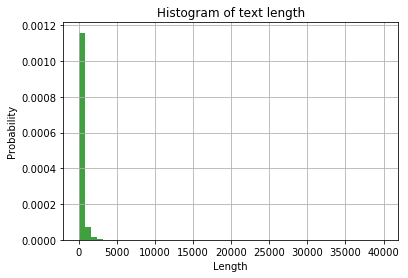

In [40]:
# the histogram of the data
plt.hist(text_length.values, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Length')
plt.ylabel('Probability')
plt.title('Histogram of text length')
plt.grid(True)
plt.show()